In [1]:
from urllib.request import urlopen
import io
import requests
import pandas as pd
import webbrowser
from PyPDF2 import PdfReader, PdfWriter

In [2]:
from wdtools import *

In [3]:
pdf_path = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping'

In [4]:
pdf_outpath = fr'{pdf_path}\output\pdf'

In [5]:
revpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output\to_review'

In [6]:
#setID = 'Set001'; nm_to_add=0
#setID = 'Set002'; nm_to_add=1420
#setID = 'Set003'; nm_to_add = 2143
#setID = 'Set004'; nm_to_add = 2878
#setID = 'Set005'; nm_to_add = 3932
setID = 'Set006'; nm_to_add = 4370
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [98]:
wd_all = get_all_wd(num=6)

In [99]:
'WD2022-0657'in wd_all.wetdet_delin_number.unique()

True

In [103]:
wd_all[wd_all.wetdet_delin_number == 'WD2022-0657']

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot,SetID
4365,WD2022-0657,01S35E00,"300p,ROW",Emigrant Hill Frontage Rd/I-84 ROW,Meacham,Umatilla,I-84 Frontage Road: Meacham Creek & UPRR (KN20...,"WD2022-0675 delin bridge replacement (s03,s10)",45.501918,-118.420849,...,NaN,NaN,85289.0,141199,4366,"ROW, Partial",2022,2022,N,5
4936,WD2022-0657,01S35E00,"300p,ROW",Emigrant Hill Frontage Rd/I-84 ROW,Meacham,Umatilla,I-84 Frontage Road: Meacham Creek & UPRR (KN20...,"WD2022-0675 delin bridge replacement (s03,s10)",45.501918,-118.420849,...,NaN,NaN,85289.0,141199,4937,"ROW, Partial",2022,2022,N,6


In [100]:
sa_gdf_all = get_all_SA(num=5)

In [101]:
'WD2022-0657'in sa_gdf_all.wdID.unique()

True

<AxesSubplot:>

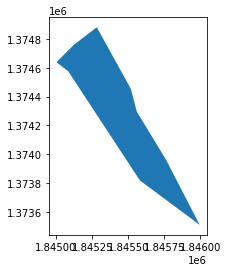

In [104]:
sa_gdf_all[sa_gdf_all.wdID=='WD2022-0657'].plot()

toCheckIDs = ['WD2018-0659', 'WD2019-0624', 'WD2019-0327', 'WD2021-0117', 'WD2021-0569', 'WD2020-0220', 'WD2017-0074']

wdIDs = [wid for wid in toCheckIDs if wid in wd_all.wetdet_delin_number.unique()]

wdIDs

wd_all[wd_all.wetdet_delin_number.isin(wdIDs)][['wetdet_delin_number', 'SetID']]

mappedIDs = [wid for wid in toCheckIDs if wid in sa_gdf_all.wdID.unique()]

mappedIDs

sa_gdf_all[sa_gdf_all.wdID=='WD2021-0495']

sa_gdf_all[sa_gdf_all.wdID=='WD2017-0074'].plot()

In [117]:
wdID = 'WD2022-0693'

In [118]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
extract_page_from_docLink(url=url, pageNm=5, wdID=wdID)

In [62]:
wd.loc[wd.wetdet_delin_number == 'WD2022-0431', ['Coord-Source', 'status_name']]

,Coord-Source,status_name
29,DSL Verified,Approved


In [86]:
wd[wd.wetdet_delin_number == wdID]['DecisionLink']

547    https://docs.dsl.state.or.us/PublicReview/Elec...
Name: DecisionLink, dtype: object

In [82]:
wd[wd.wetdet_delin_number == 'WD2022-0565']

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,received_date,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot
548,WD2022-0565,01S10W02CC,700p,Corner of Elliot St and Spruce St,Bay City,Tillamook,Hugel Lot Addition 8 WD Development,WD2022-0565 delin single family dwelling,45.51307,-123.88538,...,2022-10-10,2023-01-25,NaN,85040,140559,4919,Partial,2022,2022,N


In [8]:
wd.loc[wd.wetdet_delin_number == wdID, ['longitude', 'latitude']]

,longitude,latitude
352,-123.088023,44.677806
353,-123.086747,44.680010


In [9]:
lon=wd[wd.wetdet_delin_number == wdID].longitude.values[0]
lat=wd[wd.wetdet_delin_number == wdID].latitude.values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.088023,44.677806,POINT (639366.187 1077804.318)


In [181]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-122.862067,45.619127,POINT (707978.149 1419074.903)


In [33]:
unmapped_notes = pd.read_excel(f'{inpath}\\notes\\LCOGUnmappedRecordsJB.xlsx', skiprows=1)

In [179]:
unmapped_notes[unmapped_notes.wetdet_delin_number == wdID][['wetdet_delin_number', 'issue', 'JB Notes']].values

array([['WD2017-0050',
        'georeferencing will take some time; pages from 7 to 21',
        'There are six study areas']], dtype=object)

In [9]:
t = '02N010E30'
ct_nm = 'Hood River'

In [50]:
'02N10E30' in trsqq

True

In [52]:
create_ORMapNm(ct_nm=ct_nm, trsqq=t)

'1402.00N10.00E3000--0000'

In [10]:
create_ORTaxlot(cnt_code=cnt_dict[ct_nm], trsqq=t, lot='500')

'1402.00N10.00E3000--000000500'

In [82]:
'2107.00S11.00W01BB--000009300' in all_txid

True

In [7]:
convert_trsqq('02N010E30')

'02.00N10.00E3000'

In [13]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

Decision link is not available


In [63]:
wdID = 'WD2022-0579'
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
#print(url)
o = 0
for i in range(14, 21):
    if o==0:
        extract_page_from_docLink(url=url, pageNm=i, wdID=wdID)
    elif o==1:
        extract_page_from_locPath(filePath=pdf_path+f'\\docs\\{wdID}_10_14.pdf', 
                              pageNm=i, wdID=wdID)
    else:
        extract_page_from_locPath(filePath='C:/Users/clid1852/Downloads/WD20170490R ReissuedAgencyDecision.pdf', 
                                  pageNm=i, wdID=wdID)
    print(i)

14
15
16
17
18
19
20


In [95]:
url

'https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3643703&dbid=0'

In [140]:
wdID = 'WD2019-0320'
extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/WD20190320 AgencyDecision (2).pdf', 
                          pageNm=6, wdID=wdID)

In [319]:
wdID = 'WD2022-0694'
extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/WD20220694 InitialRequest.pdf', 
                          pageNm=20, wdID=wdID)

In [22]:
wdID = 'WD2017-0050'
extract_page_from_locPath(filePath=pdf_outpath+'\\WD2017-0050_7_21.pdf', 
                          pageNm=0, wdID=wdID)

In [57]:
wdID = 'WD2017-0381'
pages = '7_8'
for i in range(1, 3):
    filePath = pdf_outpath + f'\\{wdID}_{pages}.pdf'
    extract_page_from_locPath(filePath, i, wdID, k=7) 

In [199]:
# A - lon=-122.780067, lat=45.300856
# F - lon=-122.829843, lat=45.496684
# WTP - lon=-122.808718, lat=45.363563
# C - lon=-122.878706, lat=45.431823
# E - lon=-122.901504, lat=45.525420
# B - lon=-122.893679, lat=45.467799
pnt = get_point_from_lonlat(lon=-122.893679, lat=45.467799, transprj=True, export=True)